In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
# 1. Lấy dữ liệu giá đóng cửa của cổ phiếu VNM từ Yahoo Finance (hoặc file csv nếu có)
# Ở Việt Nam, Yahoo Finance không luôn cung cấp đủ dữ liệu, bạn có thể thay thế bằng dữ liệu từ file Excel/Csv có sẵn
# Ví dụ tải dữ liệu từ 1/1/2020 đến 1/6/2025
ticker = 'VNM'  # VNM có thể không có sẵn trên Yahoo; nếu có file csv, dùng pd.read_csv()
data = yf.download(ticker, start="2022-01-01", end="2025-06-01")
data = data.dropna()  # loại bỏ giá trị thiếu

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
print(data.tail())  # Xem 5 dòng cuối
print(data.shape)   # Xem số dòng và cột

Price       Close   High    Low   Open  Volume
Ticker        VNM    VNM    VNM    VNM     VNM
Date                                          
2025-05-23  13.14  13.14  13.05  13.05  368500
2025-05-27  13.59  13.62  13.45  13.46  523700
2025-05-28  13.71  13.74  13.60  13.61  679900
2025-05-29  13.51  13.68  13.48  13.68  981200
2025-05-30  13.59  13.64  13.50  13.50  362000
(855, 5)


In [4]:
# Tính log-returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

In [5]:
# Tính độ lệch chuẩn
sigma = data['Log_Returns'].std()

In [6]:
# Tính VaR
from scipy.stats import norm
confidence_level = 0.99
z_score = norm.ppf(1 - confidence_level)
n_shares = 1000
last_price = float(data['Close'].values[-1])
position_value = n_shares * last_price
VaR_1day = - z_score * sigma * position_value

C:\Users\USER\AppData\Local\Temp\ipykernel_19500\4173412519.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_price = float(data['Close'].values[-1])


In [7]:
from scipy.stats import norm
confidence_level = 0.99
z_score = norm.ppf(1 - confidence_level)
n_shares = 1000
last_price = float(data['Close'].values[-1])
position_value = n_shares * last_price
VaR_1day = - z_score * sigma * position_value

print(f"Giá trị nắm giữ (VNM): {position_value:,.0f} VND")
print(f"VaR 1 ngày tại mức {int(confidence_level*100)}%: {VaR_1day:,.0f} VND")

Giá trị nắm giữ (VNM): 13,590 VND
VaR 1 ngày tại mức 99%: 492 VND


C:\Users\USER\AppData\Local\Temp\ipykernel_19500\2440824558.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_price = float(data['Close'].values[-1])


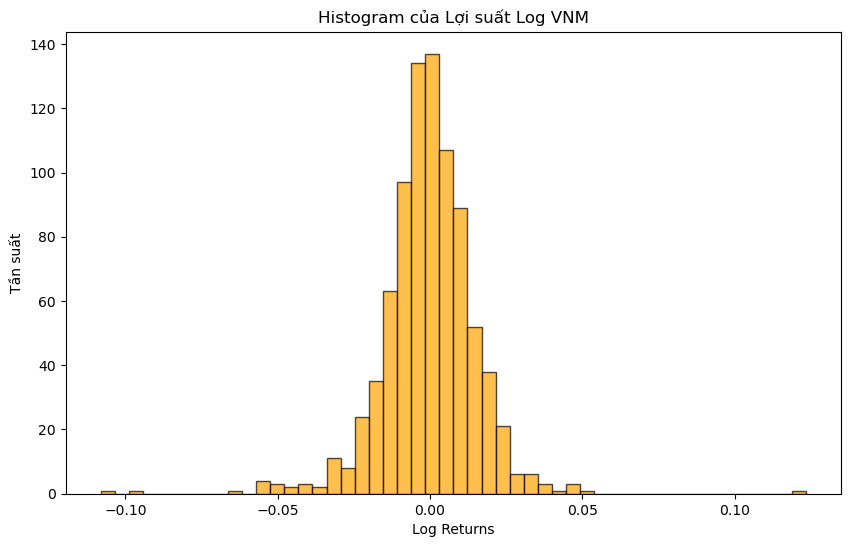

In [10]:
# Vẽ histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Log_Returns'], bins=50, edgecolor='k', alpha=0.7, color = 'orange')
plt.title("Histogram của Lợi suất Log VNM")
plt.xlabel("Log Returns")
plt.ylabel("Tần suất")
plt.show()